# titanic 생존자 예측

### 필요한 라이브러리 plotly_express 설치

In [4]:
pip install --upgrade pip

  Using cached pip-23.3.2-py3-none-any.whl.metadata (3.5 kB)
Using cached pip-23.3.2-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip --version

pip 23.3.2 from C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip (python 3.11)

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly_express

   ---------------------------------------- 0.0/233.9 kB ? eta -:--:--
   --------------------------------------- 233.9/233.9 kB 14.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -------- ------------------------------- 2.1/9.9 MB 67.1 MB/s eta 0:00:01
   -------- ------------------------------- 2.1/9.9 MB 67.1 MB/s eta 0:00:01
   -------- ------------------------------- 2.1/9.9 MB 67.1 MB/s eta 0:00:01
   -------- ------------------------------- 2.1/9.9 MB 67.1 MB/s eta 0:00:01
   --------------- ------------------------ 3.9/9.9 MB 17.7 MB/s eta 0:00:01
   -------------------------------- ------- 8.0/9.9 MB 30.1 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 31.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip --version

pip 23.3.2 from C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip (python 3.11)Note: you may need to restart the kernel to use updated packages.




### 데이터 읽기

In [64]:
import pandas as pd
titanic_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/titanic.xls'
titanic = pd.read_excel(titanic_url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 생존상황

<Axes: ylabel='count'>

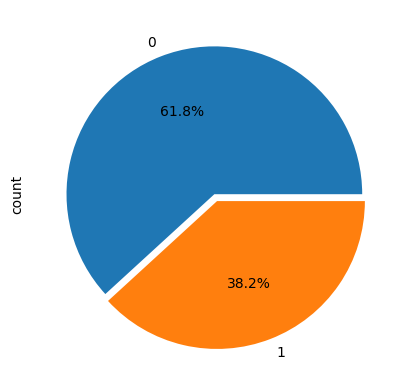

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# 생존자 라벨 별로 카운팅하여 플랏 시각화
# titanic['survived'].value_counts().plot.pie(explode=[0, 0.05]) # 옵션 autopct는 숫자를 입력해줌.
titanic['survived'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0, 0.05]) # 옵션 autopct는 숫자를 입력해줌.

### 서브플랏 사용법

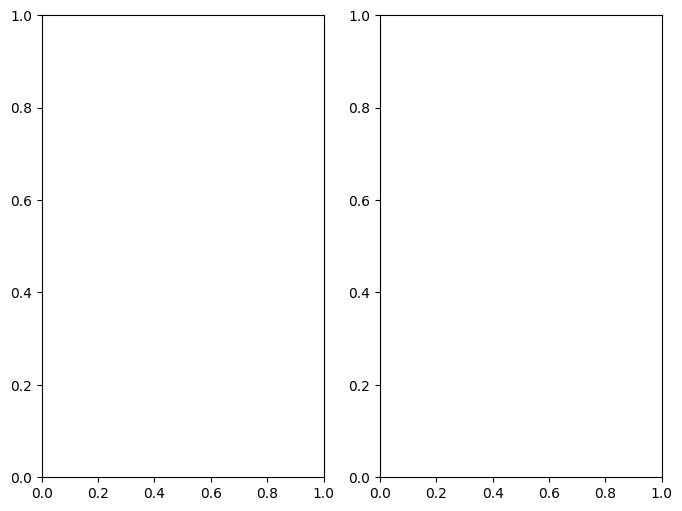

In [66]:
f, ax = plt.subplots(1, 2, figsize=(8,6))

### 그림 2개에 대한 속성은 ax 인자로 지정한다.

In [67]:
len(ax) 

2

Text(0, 0.5, '')

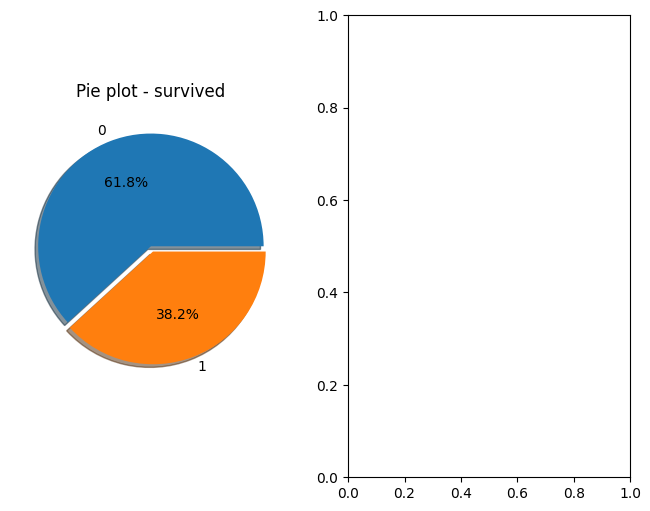

In [68]:
f, ax = plt.subplots(1, 2, figsize=(8,6))
titanic['survived'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', shadow=True, explode=[0, 0.05]) # shadow옵션 그림자 지게 함

# 왼쪽이 0, 오른쪽이 1
ax[0].set_title('Pie plot - survived')
ax[0].set_ylabel('')

Text(0, 0.5, '')

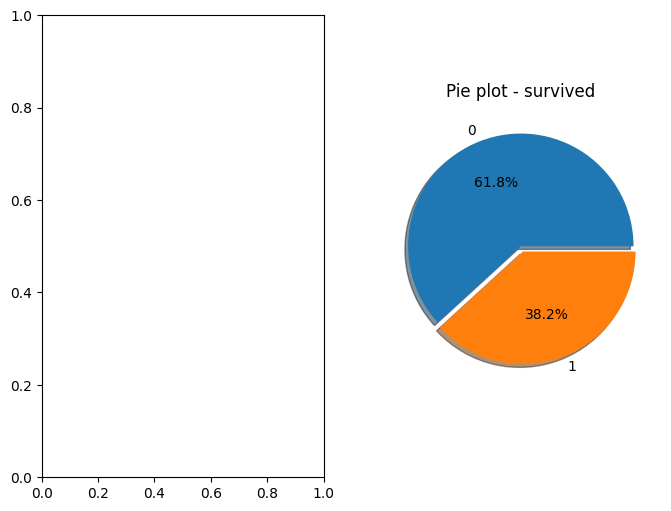

In [69]:
f, ax = plt.subplots(1, 2, figsize=(8,6))
titanic['survived'].value_counts().plot.pie(ax=ax[1], autopct='%1.1f%%', shadow=True, explode=[0, 0.05]) # shadow옵션 그림자 지게 함

# 왼쪽이 0, 오른쪽이 1
ax[1].set_title('Pie plot - survived')
ax[1].set_ylabel('')

### 왼쪽은 pie plot (사망 비율) / 오른쪽은 bar plot (사망자수)

Text(0.5, 1.0, 'Count plot - survived')

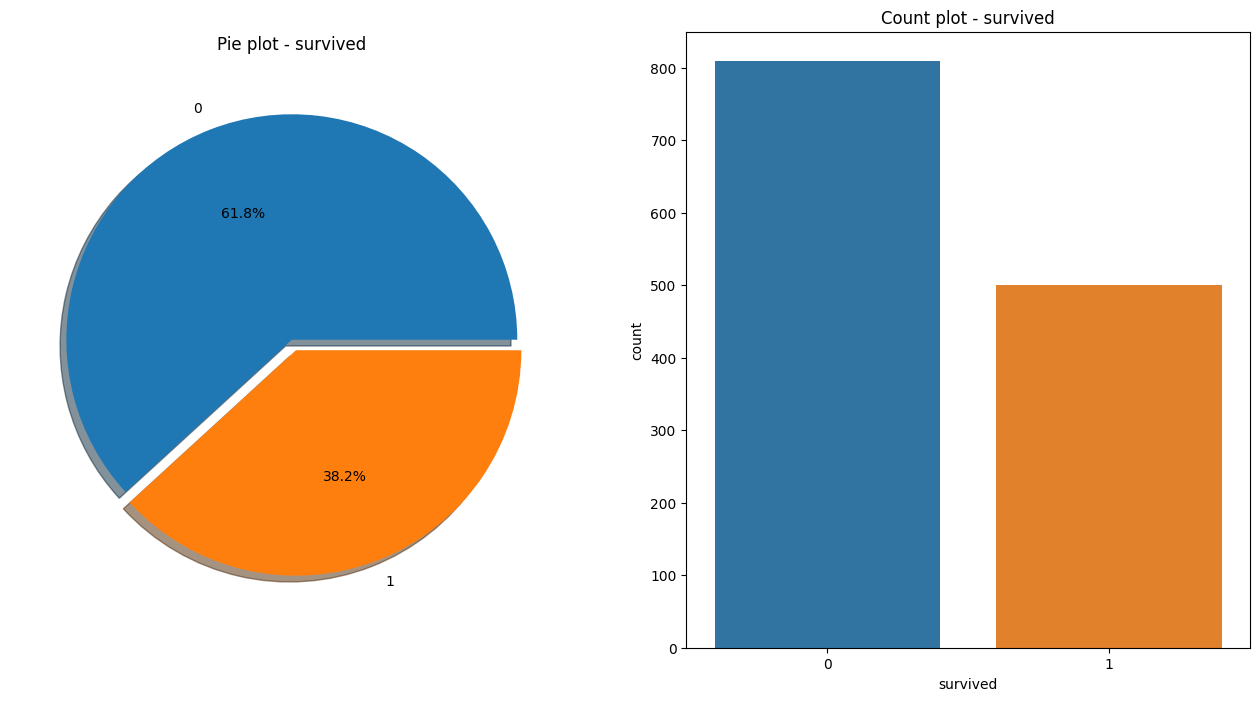

In [70]:
f, ax = plt.subplots(1, 2, figsize=(16,8))
titanic['survived'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', shadow=True, explode=[0, 0.05])

ax[0].set_title('Pie plot - survived')
ax[0].set_ylabel('')

sns.countplot(x='survived', data=titanic, ax=ax[1])
ax[1].set_title('Count plot - survived')

### 성별에 따른 사망자 수

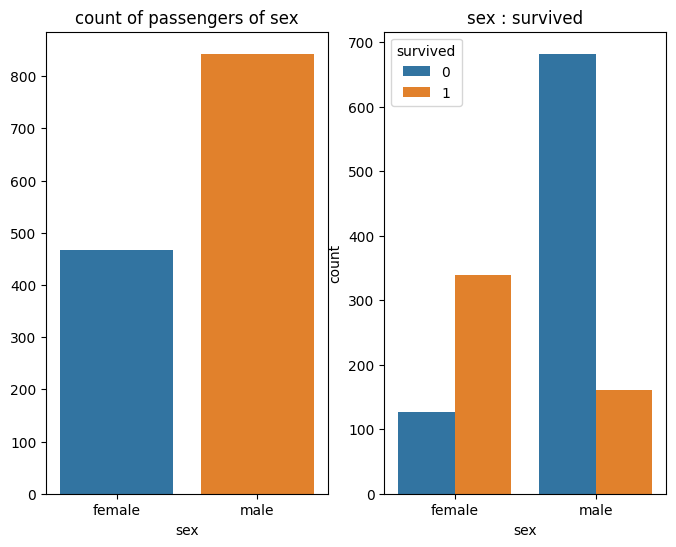

In [71]:
f, ax = plt.subplots(1, 2, figsize=(8,6))
sns.countplot(x='sex', data=titanic, ax=ax[0])
ax[0].set_title('count of passengers of sex')
ax[0].set_ylabel('')

sns.countplot(x='sex', data=titanic, hue='survived', ax=ax[1])
ax[1].set_title('sex : survived')

plt.show()

### 성별에 따른 생존율
##### 남성의 생존율이 더 낮음을 알 수 있다.

---

### 경제력에 따른 생존율

##### crosstab

In [72]:
pd.crosstab(titanic['pclass'], titanic['survived'], margins=True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


- 1등실 생존율 매우 높음, 50%를 넘는 생존율 
- 2, 3등실은 그에 비해 생존율 낮음

---

### 선실 등급별 성별상황

##### FacetGrid
- 행 row와 열 col 을 지정해 매트릭스 형태로 그리드

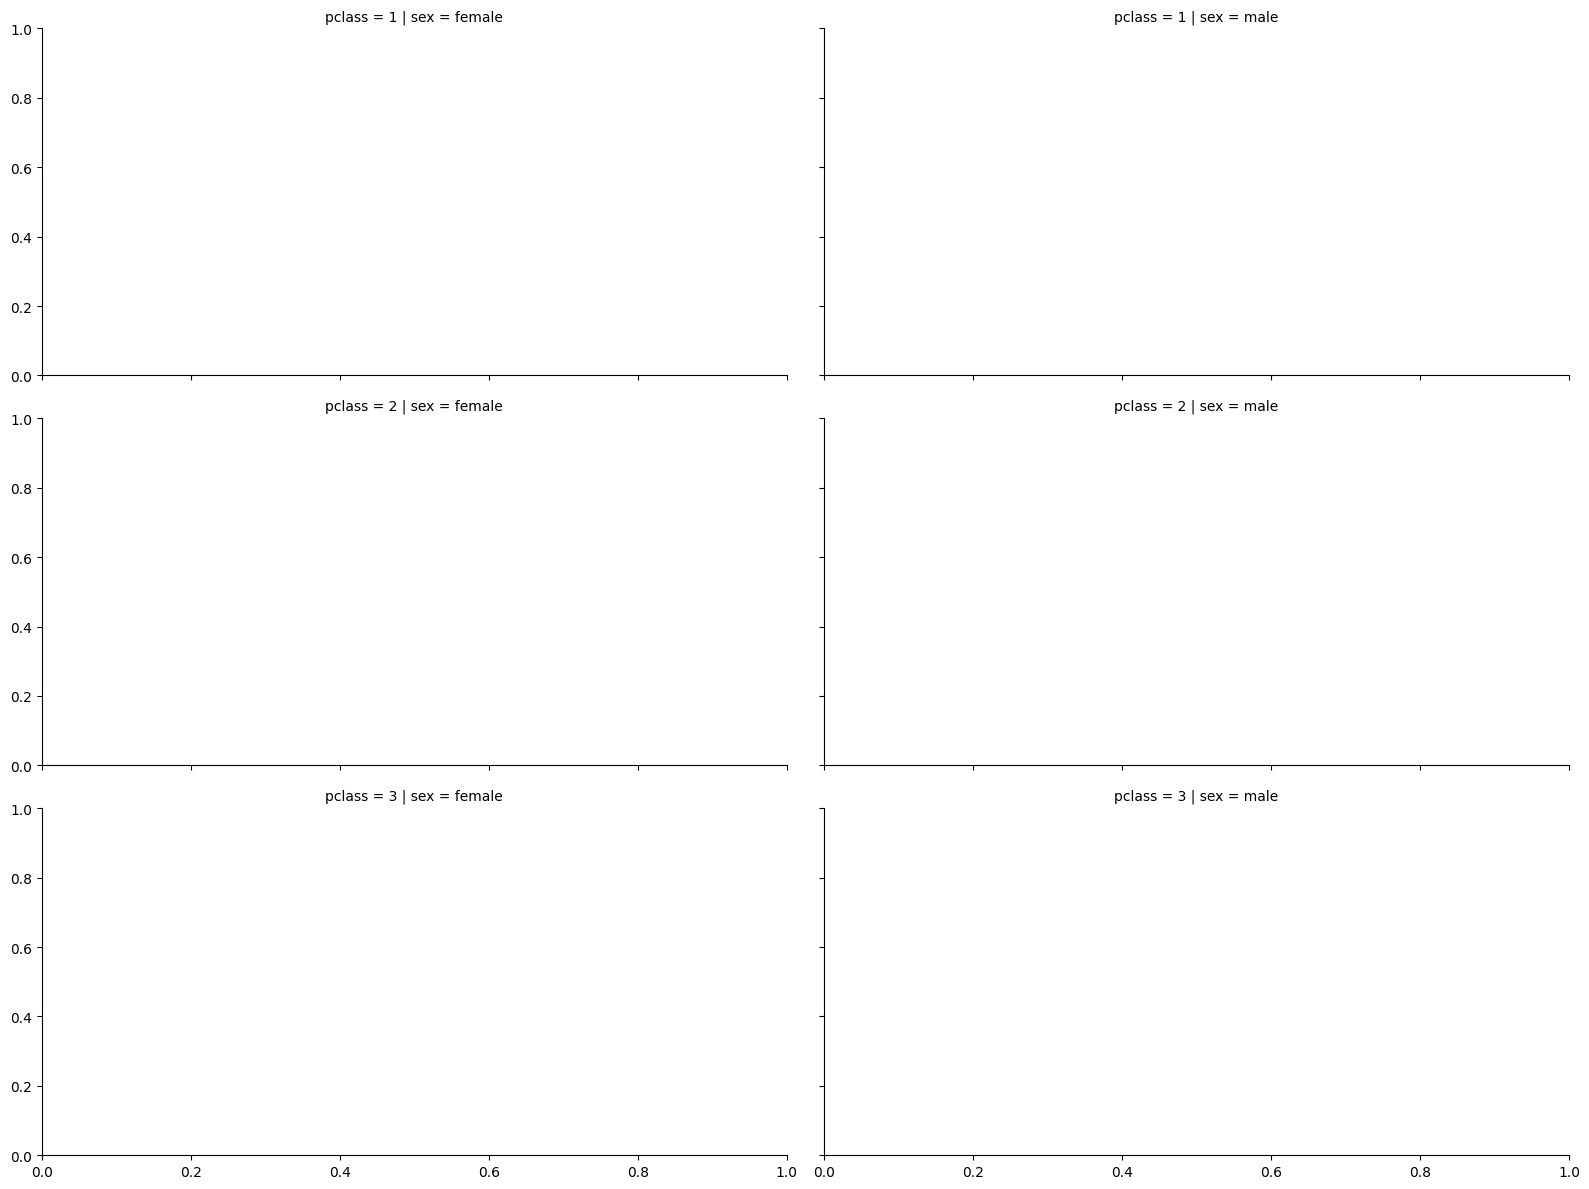

In [73]:
grid = sns.FacetGrid(titanic, row='pclass', col='sex', height=4, aspect=2)

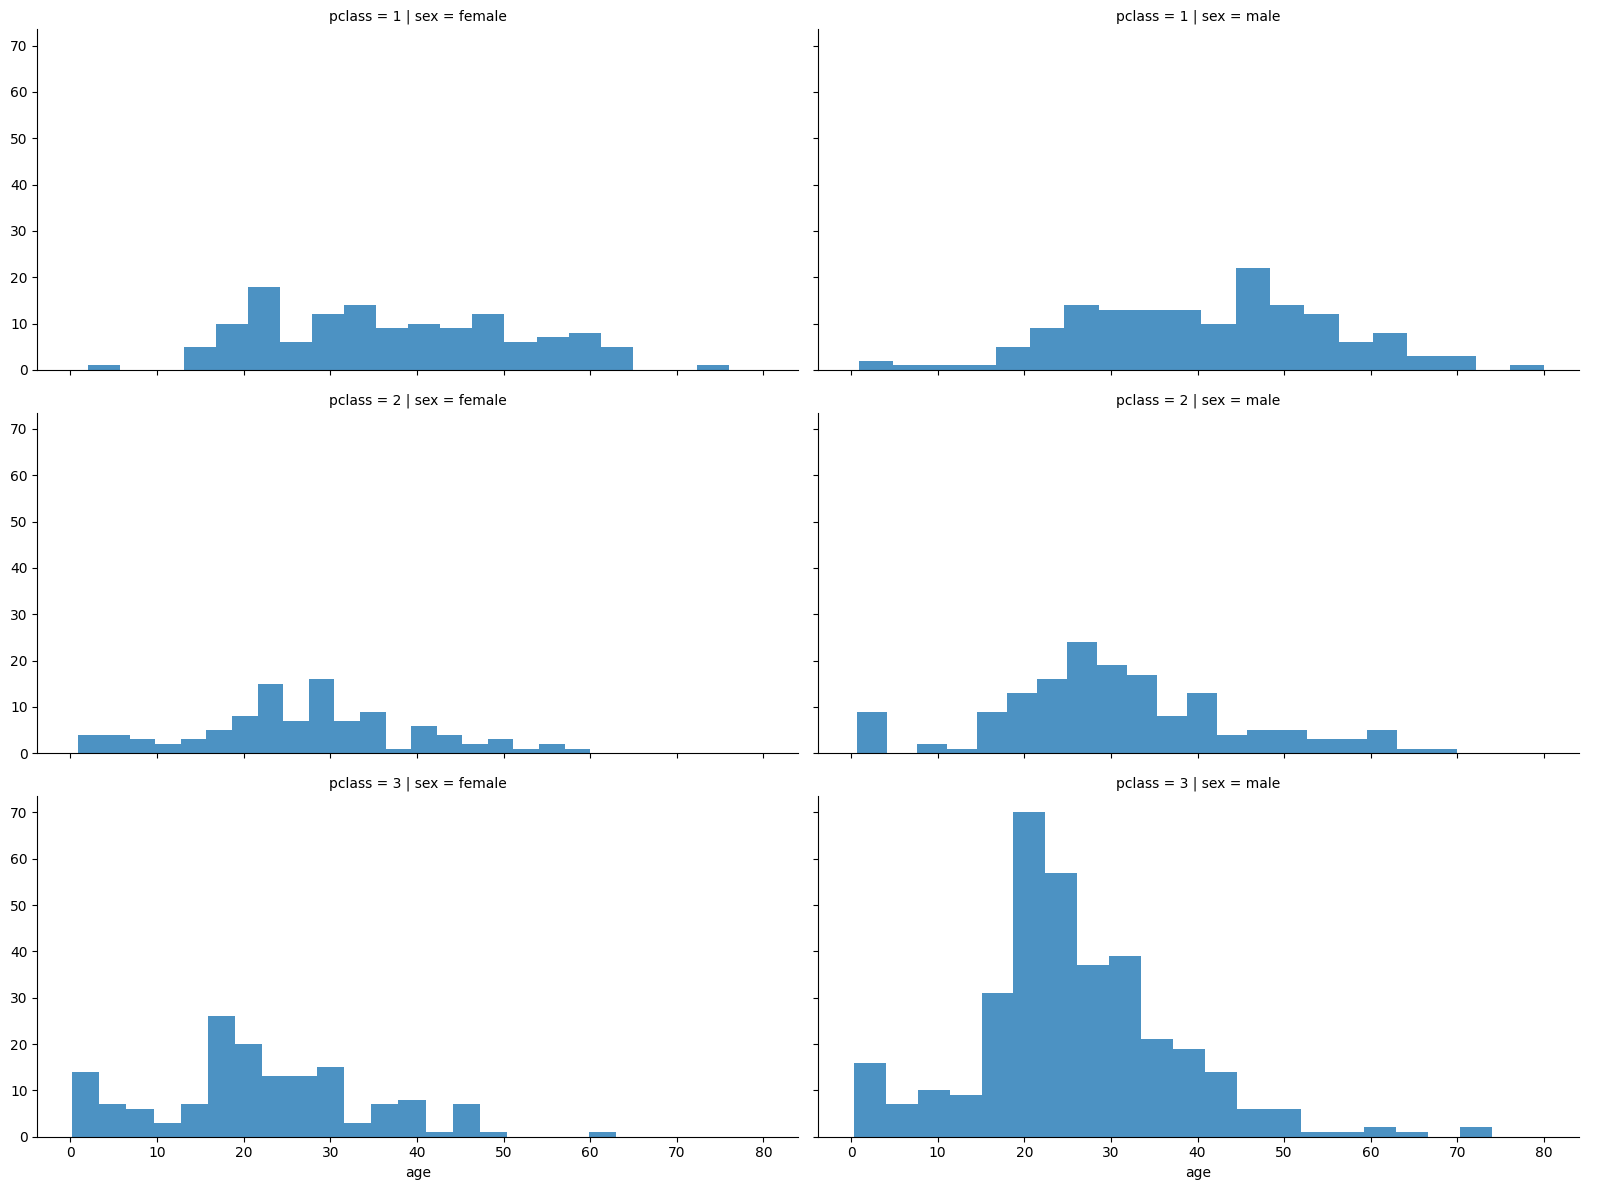

In [74]:
grid = sns.FacetGrid(titanic, row='pclass', col='sex', height=4, aspect=2)
grid.map(plt.hist, 'age' , alpha=.8, bins=20)
grid.add_legend();

- 1등실 여성, 남성 분포 : 비슷
- 2등실 0세 갓난아이가 1등실에 비해 많고 나머지는 비슷
- 3등실 남성비율이 매우 많았음. *************************

### 선실 등급별 성별상황
##### 3등실 생존율이 낮은 원인이 남성비율이 높았기 때문

---

### 나이별 승객현황

In [75]:
import plotly.express as px

fig = px.histogram(titanic, x='age')
fig.show()

- 영유아 많았음 0,1,2살
- 20대 후반 ~ 30대까지 많음.

### 나이별 승객현황
##### 아이들과 20-30대 승객이 많았음

---

### 등실 별 나이에 따른 생존율 

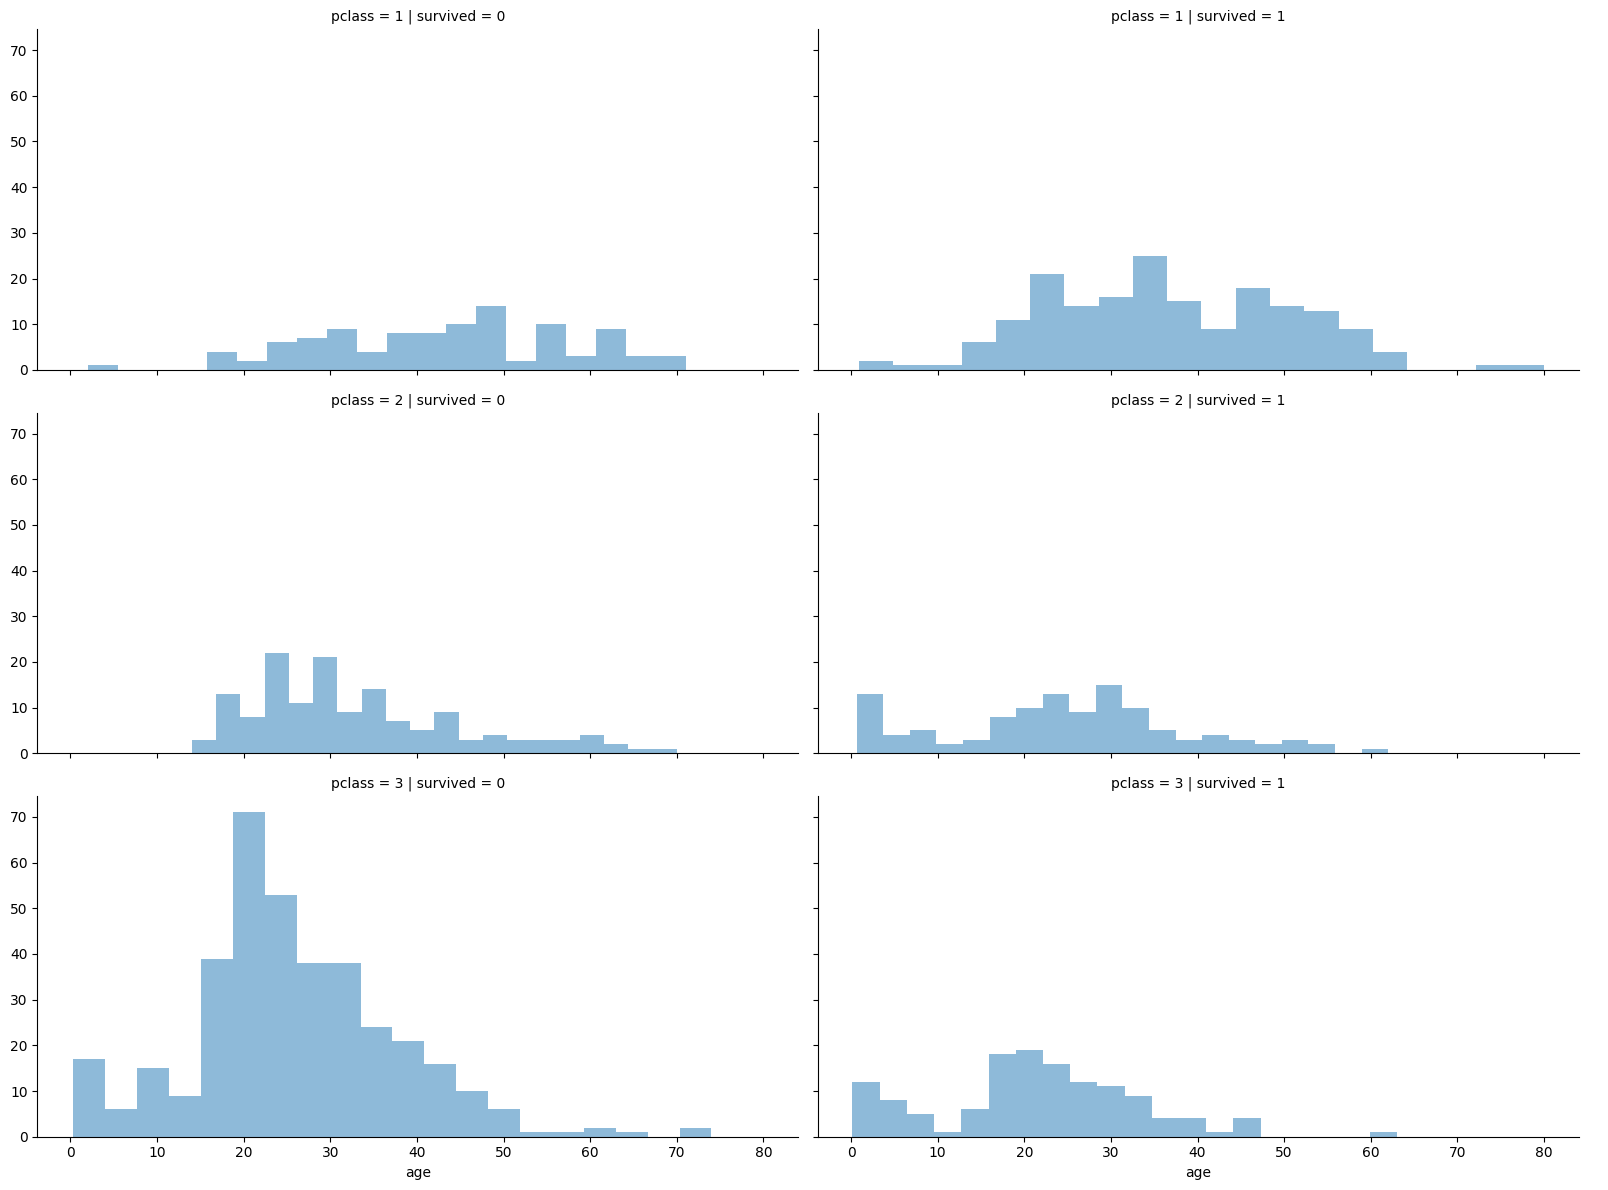

In [76]:
grid = sns.FacetGrid(titanic, col='survived', row='pclass', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

- 1등실: 나이별 분포가 생존자와 사망자가 유사함
- 2등실: 생존자의 분포에서 어린이들이 많이 살아남음
- 3등실: 심각. 20-30대 구간에서 매우 많은 사람들이 사망함.

### 나이를 5단계로 구분

##### pd.cut
- 0~6 세는 baby
- 7~14세는 teen
- 15~29세는 young
- 30~59세는 adult
- 60~100세는 old 로 맵핑하여 값이 정해진다

In [77]:
titanic['age_category'] = pd.cut(titanic['age'], bins=[0, 7, 15, 30, 60, 100],
                                include_lowest=True,
                                labels=['baby', 'teen', 'young', 'adult', 'old'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_category
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


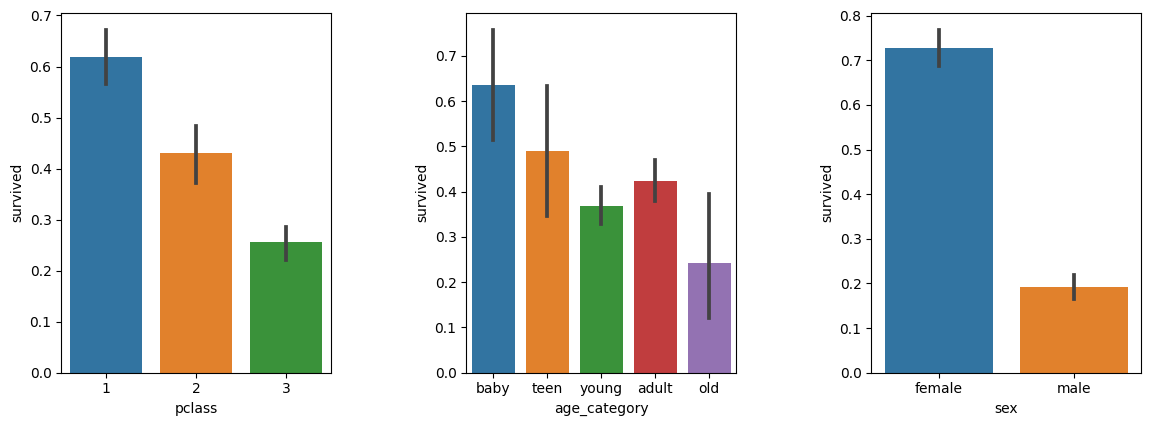

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.barplot(x='pclass', y='survived', data=titanic)

plt.subplot(132)
sns.barplot(x='age_category', y='survived', data=titanic)

plt.subplot(133)
sns.barplot(x='sex', y='survived', data=titanic)

plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=1, hspace=0.5, wspace=0.5)

plt.show()

- baby 생존율 매우 높음
- 남성 생존율 매우 낮음

### 가난한 / 20대 / 남성 : 슬픔

---

## 어리고, 여성이고, 1등실 일수록 생존하기 유리했을까?
### 남/여 나이별 생존상황

C:\Users\User\AppData\Local\Temp\ipykernel_14560\3707588653.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\User\AppData\Local\Temp\ipykernel_14560\3707588653.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




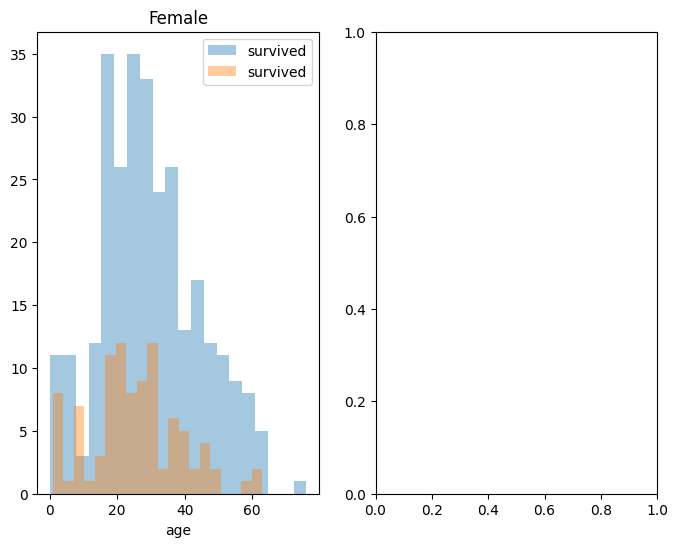

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,6))
women = titanic[titanic['sex'] == 'female']
men = titanic[titanic['sex'] == 'male']

# 여성 생존자
ax = sns.distplot(women[women['survived'] == 1]['age'], bins=20,
                 label='survived', ax=axes[0], kde=False)
# 여성 사망자
ax = sns.distplot(women[women['survived'] == 0]['age'], bins=20,
                 label='survived', ax=axes[0], kde=False)
ax.legend(); ax.set_title('Female')

plt.show();

C:\Users\User\AppData\Local\Temp\ipykernel_14560\1026277761.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\User\AppData\Local\Temp\ipykernel_14560\1026277761.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\User\AppData\Local\Temp\ipykernel_14560\1026277761.py:15: UserWarning:



`distplot` is a

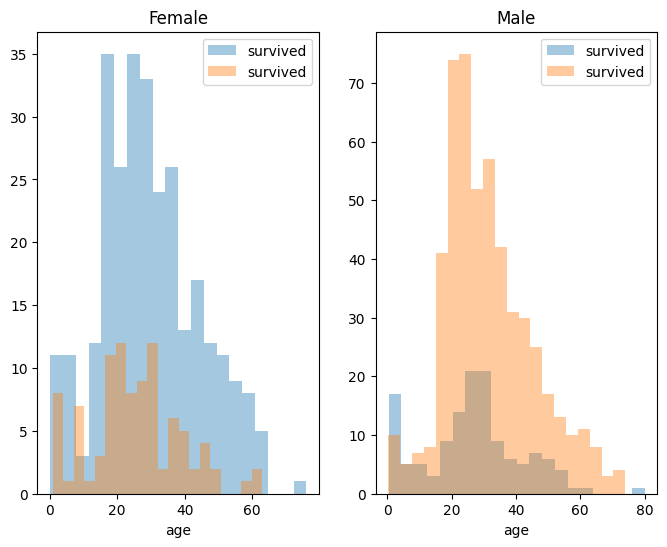

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,6))
women = titanic[titanic['sex'] == 'female']
men = titanic[titanic['sex'] == 'male']

# 여성 생존자
ax = sns.distplot(women[women['survived'] == 1]['age'], bins=20,
                 label='survived', ax=axes[0], kde=False)
# 여성 사망자
ax = sns.distplot(women[women['survived'] == 0]['age'], bins=20,
                 label='survived', ax=axes[0], kde=False)
ax.legend(); ax.set_title('Female')


# 남성 생존자
ax = sns.distplot(men[men['survived'] == 1]['age'], bins=20,
                 label='survived', ax=axes[1], kde=False)
# 남성 사망자
ax = sns.distplot(men[men['survived'] == 0]['age'], bins=20,
                 label='survived', ax=axes[1], kde=False)
ax.legend(); ax.set_title('Male')

plt.show();

- 여성은 파란색(생존자)이 많음
- 남성은 주황색(사망자)이 많음

### 이름에서 신분 파악 가능
- Miss, Master, Mr, Mrs

In [ ]:
for idx, dataset in titanic.iterrows():
    print(dataset['name'])

### 정규식 활용

In [ ]:
import re

for idx, dataset in titanic.iterrows():
    tmp = dataset['name']
    print(idx, tmp) 
    print('> ' + re.search('\,\s\w+(\s\w+)?\.', tmp).group()) 
    # 정규식 작성법
    # \,  콤마로 시작, 
    # \s  한칸 비우고, 
    # \w  글자들 우루루, 
    # \s  또 한칸 비우고
    # \w  또 글자들 우루루, 
    # ?  더 나올수도 있고 안나올 수도 있고?
    # \. 꼭 점으로 끝난다

##### 필요한 호칭 부분만 리스트에 저장
- 앞에 콤마+띄어쓰기 제거
- 뒤에 온점 제거

In [83]:
import re

title = []
for idx, dataset in titanic.iterrows():
    tmp = dataset['name']
    title.append(re.search('\,\s\w+(\s\w+)?\.', tmp).group()[2:-1])
    
    
# 데이터프레임에 title 컬럼 추가
titanic['title'] = title
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_category,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


### 성별로 확인한 귀족들
- 성별에 따른 호칭이 정해져있음

In [84]:
pd.crosstab(titanic['title'], titanic['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [85]:
# 기존 title 종류

titanic['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [91]:
# 평민신분 Miss 동의어들 정리

titanic['title'] = titanic['title'].replace('Mlle', 'Miss')
titanic['title'] = titanic['title'].replace('Ms', 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Miss')

In [90]:
# 귀족 신분은 Rare_f, Rare_m 로 통일함

Rare_f = ['Dona','Dr','Lady','the Countess']
Rare_m = ['Capt','Col','Don','Major','Rev','Sir','Jonkheer','Master']

for each in Rare_f:
    titanic['title'] = titanic['title'].replace(each, 'Rare_f')
for each in Rare_m:
    titanic['title'] = titanic['title'].replace(each, 'Rare_m')

In [88]:
# 정리한 title 종류

titanic['title'].unique()

array(['Miss', 'Rare_m', 'Mr', 'Mrs', 'Rare_f'], dtype=object)

### 사회적 신분에 따른 생존율
- Mr 평민 남성 16%, 
- Rare_m 귀족남성 44% 생존율

In [89]:
titanic[['title', 'survived']].groupby(['title'], as_index=False).mean()

,title,survived
0,Miss,0.679245
1,Mr,0.162483
2,Mrs,0.786802
3,Rare_f,0.636364
4,Rare_m,0.443038


---

# 머신러닝 이용한 생존자 예측

In [92]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   pclass        1309 non-null   int64   
 1   survived      1309 non-null   int64   
 2   name          1309 non-null   object  
 3   sex           1309 non-null   object  
 4   age           1046 non-null   float64 
 5   sibsp         1309 non-null   int64   
 6   parch         1309 non-null   int64   
 7   ticket        1309 non-null   object  
 8   fare          1308 non-null   float64 
 9   cabin         295 non-null    object  
 10  embarked      1307 non-null   object  
 11  boat          486 non-null    object  
 12  body          121 non-null    float64 
 13  home.dest     745 non-null    object  
 14  age_category  1046 non-null   category
 15  title         1309 non-null   object  
dtypes: category(1), float64(3), int64(4), object(8)
memory usage: 155.0+ KB


### 컬럼을 숫자로 변경 - Label Encode
- sex에서 female, male 이던 것을
- 0, 1로 변환하여 gender 컬럼에 저장

In [94]:
titanic['sex'].unique()

array(['female', 'male'], dtype=object)

In [98]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic['sex'])
titanic['gender'] = le.transform(titanic['sex'])
titanic.head()

# 'gender'컬럼에 여자는 0, 남자는 1

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_category,title,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare_m,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs,0


In [96]:
le.transform(titanic['sex'])

array([0, 1, 0, ..., 1, 1, 1])

### 결측치는 제거
- 나이와 요금 관련 데이터가 결측치인 행은 모두 제거

In [99]:
titanic = titanic[titanic['age'].notnull()] # age 컬럼이 null 인 행 제거
titanic = titanic[titanic['fare'].notnull()] # fare 컬럼이 null 인 행 제거
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   pclass        1045 non-null   int64   
 1   survived      1045 non-null   int64   
 2   name          1045 non-null   object  
 3   sex           1045 non-null   object  
 4   age           1045 non-null   float64 
 5   sibsp         1045 non-null   int64   
 6   parch         1045 non-null   int64   
 7   ticket        1045 non-null   object  
 8   fare          1045 non-null   float64 
 9   cabin         272 non-null    object  
 10  embarked      1043 non-null   object  
 11  boat          417 non-null    object  
 12  body          119 non-null    float64 
 13  home.dest     685 non-null    object  
 14  age_category  1045 non-null   category
 15  title         1045 non-null   object  
 16  gender        1045 non-null   int32   
dtypes: category(1), float64(3), int32(1), int64(4), object(8)

### 컬럼 간의 상관관계
- 양의 상관관계, 음의 상관관계

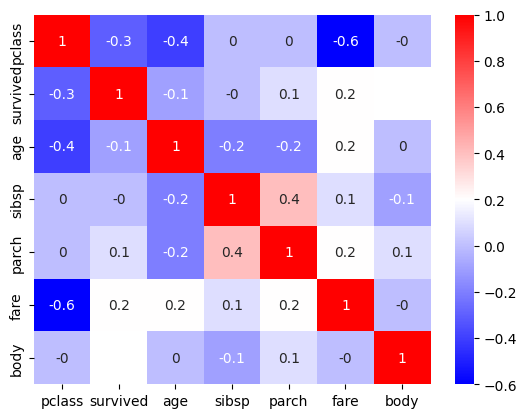

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Name' is a non-numeric column, you can exclude it
numeric_columns = titanic.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr().round(1)

sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')
plt.show()

---

### 데이터 split

In [114]:
from sklearn.model_selection import train_test_split

# 원하는 featuer만 선택
X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']]

# 생존유무를 예측하고싶으므로 survived가 target 라벨
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

### Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision tree 모델 생성
dt = DecisionTreeClassifier(max_depth=4, random_state=13)

# 학습 데이터로 학습 fit
dt.fit(X_train, y_train)

# 테스트 데이터로 예측
pred = dt.predict(X_test)

# 예측한 결과와 테스트데이터의 정답셋과 비교하여 정확도 반환
accuracy_score(y_test, pred)

0.7655502392344498

##### 디카프리오 생존률 16%

In [109]:
import numpy as np
dicaprio = np.array([[3, 18, 0, 0, 5, 1]])
dt.predict_proba(dicaprio)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array([[0.83271375, 0.16728625]])

In [112]:
print('디카프리오 생존률: ', dt.predict_proba(dicaprio)[0, 1])

디카프리오 생존률:  0.16728624535315986


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



##### 윈슬릿 생존률 100%

In [118]:
winslet = np.array([[1, 16, 1, 1, 100, 0]])
dt.predict_proba(winslet)[0,1]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



1.0

# 내가 타이타닉호에 탔더라면?
- 만약 나라면
- 3등급에 30살에 
- 엄마랑 둘이 탔다는 가정하에 sibsp=0, parch=1, 
- 요금은 39.6875 최저가를 샀겠지?

### 생존율 0% 로 나는 죽었겠다 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ

In [138]:
feature = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']

I = np.array([[3, 30, 0, 1, 39.6875, 0]])
dt.predict_proba(I)[0,1]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



0.0

### 힝 우리 엄마도 같이 죽었겠다..

In [141]:
MyMother = np.array([[3, 65, 0, 1, 39.6875, 0]])
dt.predict_proba(MyMother)[0,1]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



0.0

### 돈 많이 벌어서 일등급에 100달러짜리 탈거야... 

In [142]:
MyMother = np.array([[1, 65, 0, 1, 100, 0]])
dt.predict_proba(MyMother)[0,1]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



1.0

In [143]:
I = np.array([[1, 30, 0, 1, 100, 0]])
dt.predict_proba(I)[0,1]

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



1.0